# Project-4 : Titanic Project

**Project Description:**

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [61]:
# Importing Necessary Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [62]:
# Importing the Dataset:

data = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [63]:
# To display top 5 rows:

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
data.shape

(891, 12)

**There are 891 rows and 12 columns present in this Dataset.**

In [65]:
# To display columns name:

data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [66]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [67]:
# Checking for null values:

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**There are some features which have null values , like Age , Cabin & Embarked.**

**Since , there are some null values present in Dataset , so have to treat them.**

# Handeling Null Values:

**As in cabin features most of the values are null values , so it's better to drop this column from dataset.**

In [68]:
data = data.drop(columns="Cabin",axis=1)

**There are 177 values are null values in age column , and It is important features so let's fill null values with mean of other values in 'Age' column . We will fill values with mean , because this is an continuous data.**

In [69]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

**There is one column named Embarked which has just 2 null values , and It seems this has categorical values , so firsty we will check unique values in this column and then we will null values with mode.**

**We will fill null values with mode because , this column has categorical values.**

In [70]:
# Checking Unique values:

data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

**There are 4 values in this column , S ,C, Q and nan. We have to fill nan values, by taking the mode of othet values.**

In [71]:
# Checking for most repeated value in Embarked Column:

data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [72]:
# Filling null values with mode:

data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [73]:
# To verify , if there are some null values or not:

data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Great , There are no null values . We can go ahead.**

In [74]:
# To display top 5 rows:

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [75]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Conclusion:**

**In fare column, minimum value is 0 , which means travel was free  , and maximum fare is 512.**

**There are some columns like Name , Sex, Ticket , Cabin and Embarked are not included in this statistics , because these are the categorical columns , and this method only works on Continuous data.**

**It is observed that dataset seems to be having more outliers as well as skewness in the data. The column Age and Fare has huge outliers from the max of 80 and 512 respectively which is quite far from their mean with their second quantile median(50%).**

# Data Visualization:

**Let's use countplot for Categorical Columns.**

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

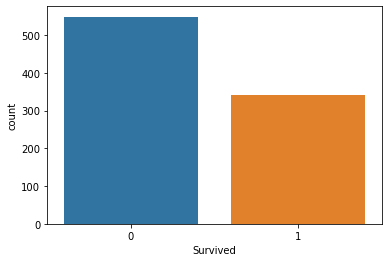

In [76]:
#Count Plot for "Survived" column

print(data["Survived"].value_counts())

sns.countplot("Survived",data=data)

**Here 0= not survived and 1= survived**

Total no of Survived= 342 and not survived= 549

**Here , Not Survived People are more than Survived People.**

['male' 'female']
male      577
female    314
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

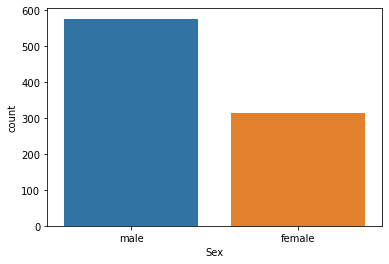

In [77]:
#Count Plot for "Sex" column
print(data["Sex"].unique())
print(data["Sex"].value_counts())

sns.countplot("Sex",data=data)

**Total Number of Male present is more than Total Number of Female present in Titanic Train.**

<AxesSubplot:xlabel='Sex', ylabel='count'>

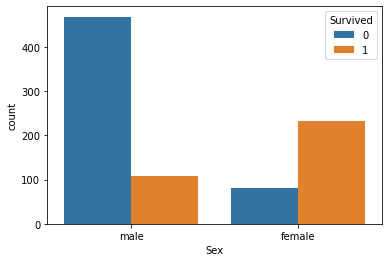

In [78]:
#Count Plot for Survived Male and Survived Female

sns.countplot("Sex", hue="Survived", data=data)

**Total Number of Survived Female is more than Total Number of Survived Male.**

[3 1 2] 

Total no of people in All Pclass are: 

3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

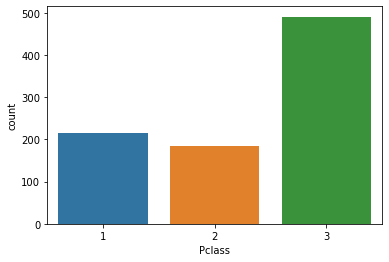

In [79]:
#Count Plot of "Pclass" Column
print((data["Pclass"].unique()),"\n")

print("Total no of people in All Pclass are:","\n")

print(data["Pclass"].value_counts())   # value_counts() will give the total values in column.

sns.countplot("Pclass",  data=data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

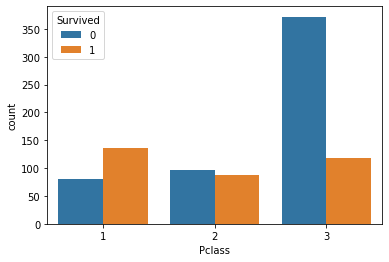

In [80]:
#Count Plot for Survived people in "Pclass"  column

sns.countplot("Pclass", hue="Survived", data=data)

['S' 'C' 'Q'] 

Total no: 

S    646
C    168
Q     77
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

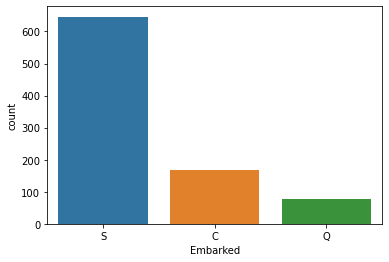

In [81]:
#Count Plot of "Embarked" Column

print((data["Embarked"].unique()),"\n")
print("Total no:","\n")
print(data["Embarked"].value_counts())

sns.countplot("Embarked",  data=data)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

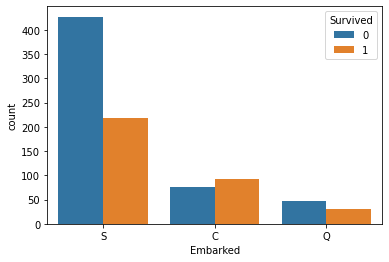

In [82]:
#Count Plot for Survived people in "Embarked" column

sns.countplot("Embarked", hue="Survived", data=data)

[0 1 2 5 3 4 6] 

Total no: 

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


<AxesSubplot:xlabel='Parch', ylabel='count'>

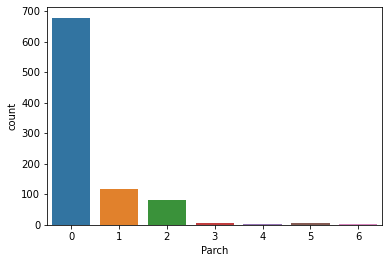

In [83]:
#Count Plot of "Parch" Column

print((data["Parch"].unique()),"\n")
print("Total no:","\n")
print(data["Parch"].value_counts())

sns.countplot("Parch",  data=data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

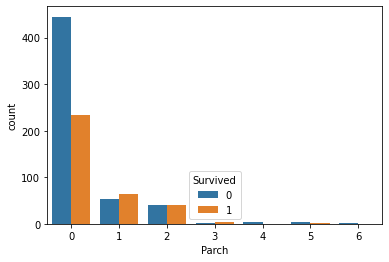

In [84]:
#Count Plot for Survived people in "Parch" column

sns.countplot("Parch", hue="Survived", data=data)

<Figure size 1080x720 with 0 Axes>

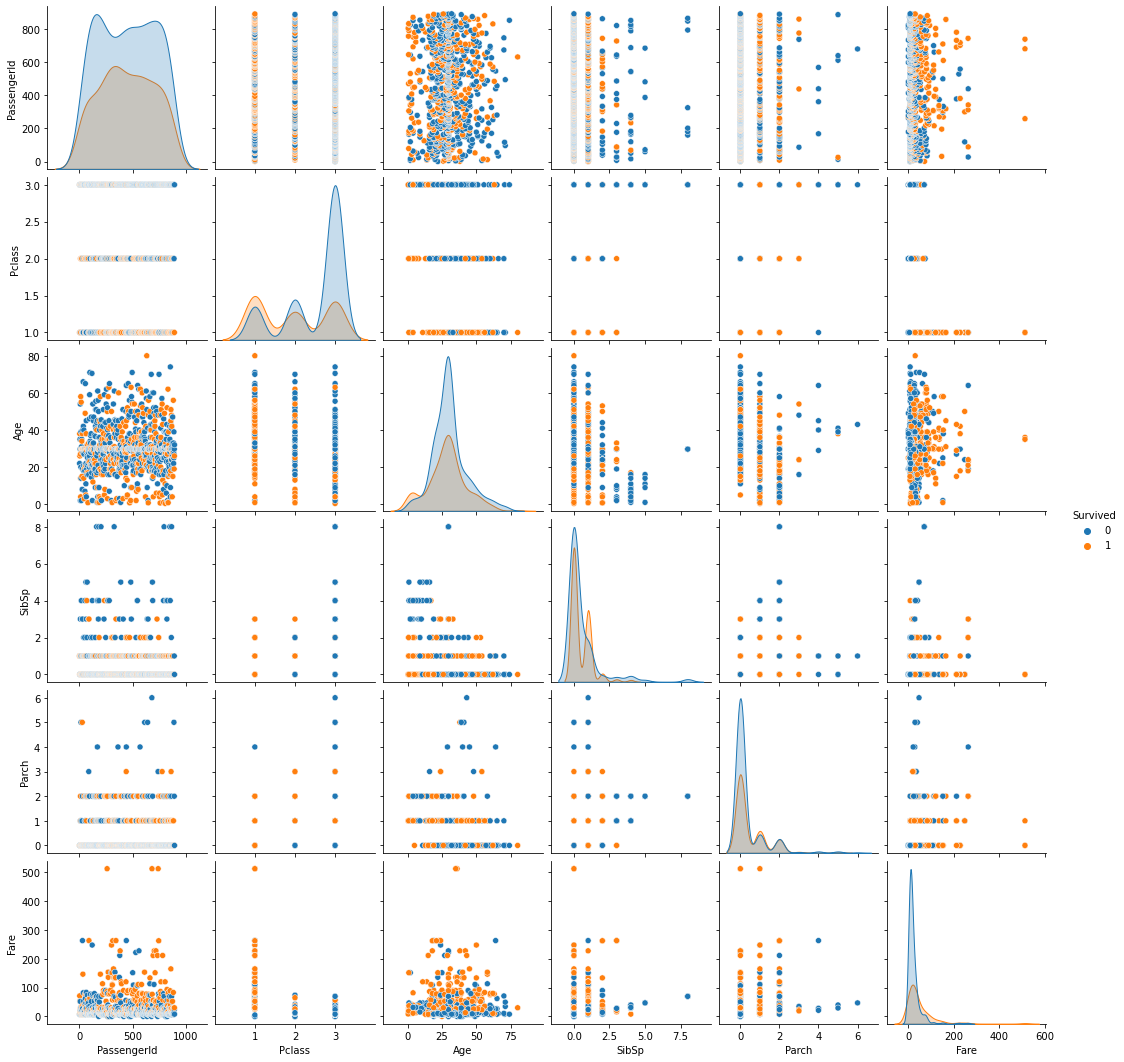

In [85]:
plt.figure(figsize=(15,10))
sns.pairplot(data=data,hue="Survived")

**This pair plot gives the relation between the columns which are plotted on the basis of target variable 'Survived'.**

# Normal Distribution Curve:

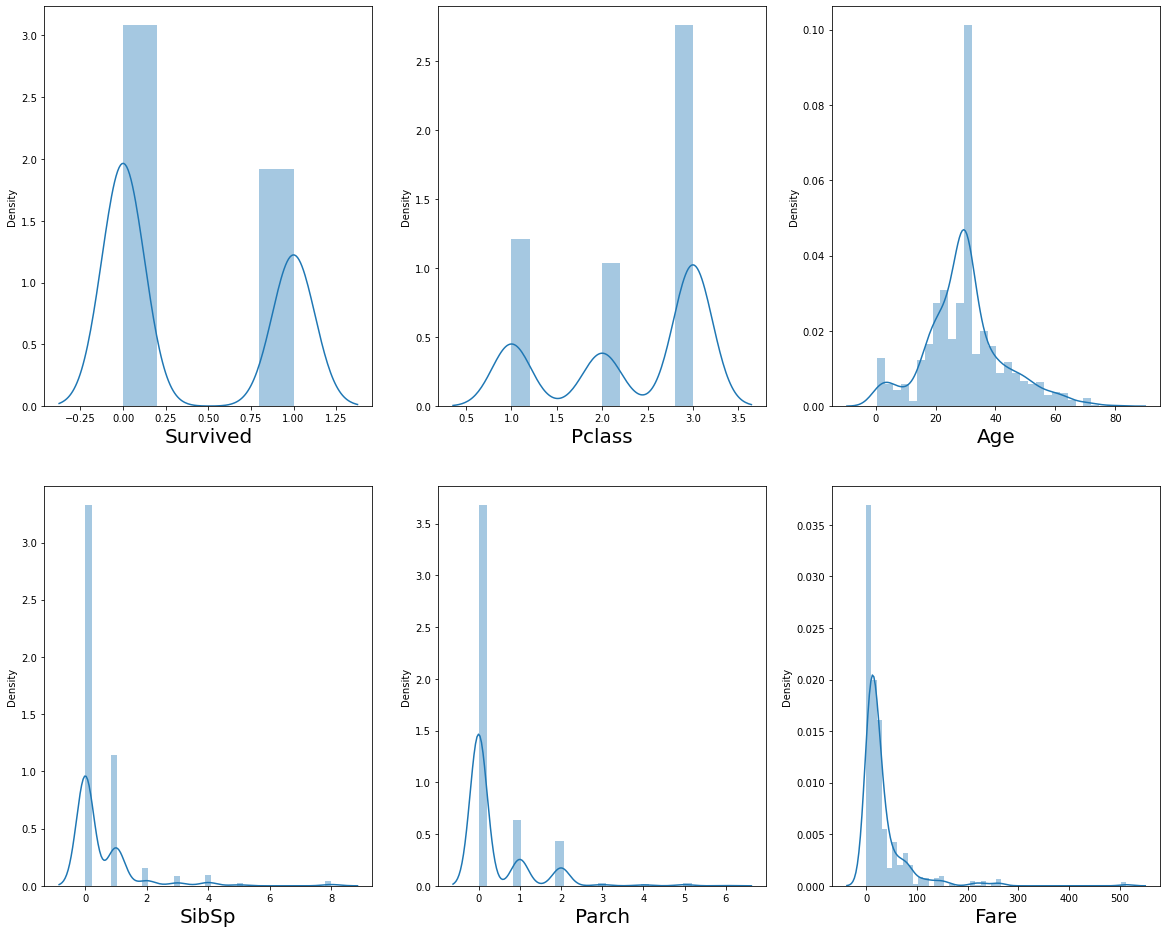

In [86]:
columns=[ 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch',  'Fare',]
plt.figure(figsize=(20,25))
plotnumber = 1

for column in data[columns]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Correlation:

In [87]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


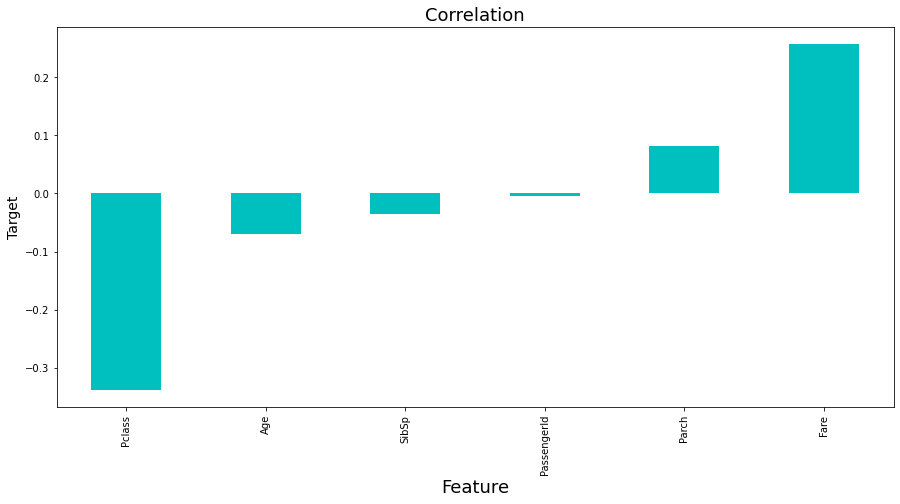

In [88]:
# Checking correlatio with Bar plot:

plt.figure(figsize=(15,7))
data.corr()['Survived'].sort_values(ascending=True).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

**Observations:**

**Parch and Fare are positively correlated with target , and Pclass , Age , SibSp are negatively correlated with target column.**

**Passengerid has no relation with the target column.**

In [89]:
# Dropping PassengerId column:

data.drop(columns=['PassengerId'],axis=1,inplace=True)

**Now there are some columns which have text values ,as system only works on numeric data. So have to convert these columns to numeric data using encoders.**

In [90]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [91]:
#checking Original Data
data["Sex"].unique()

array(['male', 'female'], dtype=object)

In [92]:
#Coverting "Sex" column data which contains categorical data into continuous data.

data['Sex']=encoder.fit_transform(data['Sex'])
data["Sex"].unique()


array([1, 0])

In [93]:
#checking Original Data in Embarked Column

data["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [94]:
#Coverting "Embarked" column data which contains categorical data into continuous data.

data['Embarked']=encoder.fit_transform(data['Embarked'])
data["Embarked"].unique()

array([2, 0, 1])

In [95]:
#Coverting "Ticket" column data which contains categorical data into continuous data.

data['Ticket']=encoder.fit_transform(data['Ticket'])
data["Ticket"].unique()

array([523, 596, 669,  49, 472, 275,  85, 395, 344, 132, 616,  38, 535,
       333, 413, 153, 480, 151, 301, 184, 139, 152, 278,  42, 329, 179,
        95, 283, 362, 598, 586, 288, 549, 600,  43, 202, 514, 302, 186,
       507,  53, 391, 634, 282, 617, 462,  76, 190, 377, 249, 522, 587,
       239,  29,  94, 555, 215, 561, 566, 197,  32, 457, 337, 601, 189,
       553, 623, 248, 270, 557, 621, 204,  80, 347, 355, 473, 158, 432,
       304, 311, 280,  25, 637, 247, 676, 652, 297, 298, 341, 678, 548,
       428, 475, 607, 612, 117, 150, 384, 361, 417, 505, 245, 354, 296,
       254, 388, 469,   2, 193, 274, 491, 176, 666, 460, 585, 540, 219,
       463, 541, 196, 318, 380, 640, 537, 111, 552, 630,  55, 504, 592,
       203, 332, 668, 438, 118, 558, 405, 113, 147, 622,  36, 516, 538,
       573, 595, 418, 654, 258, 568, 470, 559, 323, 265, 423,  28, 576,
         5, 659,  90, 412, 488, 593, 169, 574, 629, 114, 271,  34, 459,
        11, 435, 386, 122, 227, 406, 604, 452, 494, 461, 160, 30

In [96]:
# To verify:

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,2


In [97]:
# Here we can drop 'Name' & 'Ticket' columns too , as it is just for identity , but we want count of survival , so 'name' & 'ticket' is irrelevent here.

data.drop(columns=['Name'],axis=1,inplace=True)

In [98]:
data.drop(columns=['Ticket'],axis=1,inplace=True)

In [99]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [100]:
# Let's separate features and label:

X= data.drop(columns=['Survived'],axis=1)
y = data['Survived']

In [101]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [103]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Splitting the data into training and testing

In [105]:
X_train , X_test ,y_train ,y_test = train_test_split(X ,y , test_size=0.2 ,random_state=2)

**Here , X is splitted into two datasets , training dataset(X_train) ,and testing dataset(X_test) . Similarly , Y is splitted into two datasets training dataset(y_train) and testing dataset (y_test).**

**As test size = 0.2 , it means 80% of data will be used in training and 20% of data will be used in testing.**

In [106]:
print(X.shape ,X_train.shape ,X_test.shape)

(891, 7) (712, 7) (179, 7)


# Model Training:

In [107]:
lr = LogisticRegression()

In [110]:
# Training the LogisticRegression model with training data:

lr.fit(X_train ,y_train)   # This will train our machine learning model

LogisticRegression()

# Model Evaluation:

**We will evaluate the data by finding the accuracy score.**

In [113]:
 x_train_pred = lr.predict(X_train)   # To predict what it learned from training on X dataset.
x_train_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

**These are the predicted values of the passengers survived or not  , let's compare these values with actual target values(i.e y_train values).**

In [116]:
accuracy = accuracy_score(y_train,x_train_pred)
print('Accuracy score of training data:',accuracy)

Accuracy score of training data: 0.8132022471910112


**Here , the model gives 81% accuracy on training data , which means it is giving 81% accurate prediction of passengers survives or not , on trainig data.**

**Now , let's check model accuracy on unseen(testing data).**

In [118]:
# Accuracy on test data:

x_test_pred = lr.predict(X_test)
x_test_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [121]:
accuracy_ = accuracy_score(y_test,x_test_pred)
print('Accuracy score of testing data:',accuracy_)

Accuracy score of testing data: 0.7877094972067039


# Conclusion: 

**Here , we evaluated the model by finding the accuracy score.**

**In training dataset , model gave 81% of accuracy , which means model is 81% accurately predicted that a passenger is survived or not.**

**In testing data (or in unseen data) , model gave 78% of accuracy , which means model predicted 78% accurate results of passenger survival , on unseen(test) data.**

**Accuracy Score on training dataset : 81% , Accuracy Score on Testing dataset : 78%.**

There is no much difference between both the accuracy score , it means our model predicted well on given dataset.

In conclusion, the accuracy score of 78% for the Titanic dataset indicates that our model is able to correctly predict the survival of passengers in the dataset with a moderate level of accuracy. 

# Classification Algorithms:

Let's try other machine learning algorithms to test the accuracy score.

In [124]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier

In [127]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train,y_train)
pred_dtc = dtc.predict(X_test)

print(accuracy_score(y_test, pred_dtc))
print(confusion_matrix(y_test, pred_dtc))
print(classification_report(y_test,pred_dtc))

0.7877094972067039
[[82 18]
 [20 59]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.77      0.75      0.76        79

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



**Decision tree algorithm gives 79% accuracy.**

# Random Forest Classifier


In [128]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

print(accuracy_score(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test,pred_rfc))

0.7988826815642458
[[85 15]
 [21 58]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       100
           1       0.79      0.73      0.76        79

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



**Random forest classifier  gives 80% accuracy.**

**So , we are geting approx same accuracy with difference algorithms too.**